

# Gun violence data / Avance II - Equipo \#5



### INTEGRANTES
- Brayan Arturo Gonzalez Barron 1620548 
- Jose Eduardo Lince Alvarez 1745066 
- Gonzalo Adrián Cavazos Rodríguez 1742463 

### Objetivos
Objetivo Principal:
Al estudiar este conjunto de datos se pretende poder hacer deducciones con base al comportamiento de estos, en el aspecto de que lugares son más peligrosos, o propensos en los que ellas personas puedan sufrir de un atentado, además con base a sus características predecir el estatus del participante.

#### Objetivos Secundarios:
 - Situación final de los participantes, ya sea víctima, sospechoso, etc.
 - Que tanta posibilidad hay de morir en un incidente con arma de fuego
 - Determinar si el genero o la edad influyen en los incidentes


### Caracteristicas Principales
- Gran cantidad de datos
- Datos relativamente recientes
- Variedad de datos (Estatus final de participantes, edad, fecha, etc)

### Beneficios de trabajar con esta BD
Encontramos que hay una fuerte relacion con los datos relacionados, por lo que pudimos identificar algunos de los metodos de analisis que podriamos utilizar.
Tambien observamos que nuestra base de datos presenta datos continuos y discretos con los cuales se puede trabajar para sacar clasificaciones o regresiones que nos definan la relación que existe entre estos mismos

### Preguntas de interes
¿Cuáles son los estados más peligrosos o mortales?

¿Hay una alza o baja de violencia por ataques de arma de fuego por estado? (Los mas peligrosos) 

En base a la pregunta anterior, predecir si seguirán en aumento, bajaran, o se mantendran igual los indices de violencia (por estado). 

### MOTIVACION 
A traves de distintas tecnicas de mineria de datos, poder responder a las preguntas planteadas apoyandonos de algunos de los metodos estadisticos para la prediccion de eventos en futuro.

    

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"gun-violence.csv")

## Preparacion

Vemos que columnas podremos encontrar en este dataset, tenemos el id para determinar numero de incidentes,
tambien fecha para saber cuando sucedieron los hechos, tenemos ubicaciones y direcciones de los eventos que
nos podrian ayudar a filtrar y crear clases de zonas, 
numero de muertos para tomar encuenta los indices de violoencia, 
edad de los participantes para tambien obtener algun indicador de edad

In [3]:
df.head(5)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


### Conteo de datos y columnas
Podemos darnos cuenta que tenemos 239667 registros antes de realizar nuestra limpieza y alrededor de 29 columnas, no ocuparemos todas para la resolucion de las preguntas asi en la limpieza eliminaremos las que no son necesarias

In [4]:
print(df.shape)

(239677, 29)


In [5]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

### Renombrando Columnas
Le daremos un nombre en español a las columnas.

Ademas, podemos describir nuestras columnas de una mejor manera

In [6]:
df=df.rename(columns={'incident_id':'id', 'date':'fecha', 'state':'estado', 'city_or_county':'condado_o_localidad', 'address': 'direccion',
                 'gun_type':'tipo_arma', 'n_injured':'num_lesionados', 'location_description':'desc_lugar',
                  'participant_age':'edad_participante', 'participant_age_group':'edad_grupo_participantes',
                      'n_guns_involved' : 'armas_involucradas',
                   'participant_gender':'genero_participante', 'participant_relationship': 'relacion_participante',
                   'participant_status':'estatus_participante','participant_type':'tipo_participante', 'n_killed':'num_muertos'})

In [7]:
df.dtypes

id                               int64
fecha                           object
estado                          object
condado_o_localidad             object
direccion                       object
num_muertos                      int64
num_lesionados                   int64
incident_url                    object
source_url                      object
incident_url_fields_missing       bool
congressional_district         float64
gun_stolen                      object
tipo_arma                       object
incident_characteristics        object
latitude                       float64
desc_lugar                      object
longitude                      float64
armas_involucradas             float64
notes                           object
edad_participante               object
edad_grupo_participantes        object
genero_participante             object
participant_name                object
relacion_participante           object
estatus_participante            object
tipo_participante        

### Identificando valores unicos
Haremos una visualizacion de los valores unicos para las columnas estado, condado_o_localidad

---

In [8]:
count_column = df.estado.unique()
print( count_column , ' | Total: ', len(count_column))

['Pennsylvania' 'California' 'Ohio' 'Colorado' 'North Carolina' 'Oklahoma'
 'New Mexico' 'Louisiana' 'Maryland' 'Tennessee' 'Missouri'
 'District of Columbia' 'Illinois' 'Delaware' 'Utah' 'Michigan' 'Georgia'
 'Indiana' 'Mississippi' 'New York' 'Florida' 'Washington'
 'South Carolina' 'Arizona' 'Kentucky' 'New Jersey' 'Virginia' 'Wisconsin'
 'Rhode Island' 'Texas' 'Alabama' 'Kansas' 'Connecticut' 'West Virginia'
 'Minnesota' 'Nevada' 'Nebraska' 'Massachusetts' 'Hawaii' 'New Hampshire'
 'Iowa' 'Alaska' 'Arkansas' 'Idaho' 'Oregon' 'Wyoming' 'Maine'
 'North Dakota' 'Montana' 'Vermont' 'South Dakota']  | Total:  51


Vemos que para la columna estado tenemos un total de 51 columnas unicas, con la cual, podriamos hacer graficas ya que no presenta una gran cantidad de datos


---

In [9]:
count_column = df.condado_o_localidad.unique()
print( count_column , ' | Total: ', len(count_column))

['Mckeesport' 'Hawthorne' 'Lorain' ... 'Montgomery Creek'
 'Chaffee (Allenville)' 'St Paul']  | Total:  12898


En este caso, para la columna condado_o_localidad tenemos demasiados registros unicos, por lo que si se quisiera una grafica con estos datos, tendriamos que aminorar la cantidad, talvez buscando por los que mas coincidencias tienen.

### Datos Nulos

A continuacion, buscaremos por columna, si hay almenos algun dato nulo.
Podemos observar que las columnas fecha, estado, ciudad_o_pais, num_muertos no tienen datos en nulo, pero hay 2 campos que si vamos a ocupar, los cuales son edad_participante y estatus_participante y si contienen datos nulos.

In [10]:
df.isnull().any()

id                             False
fecha                          False
estado                         False
condado_o_localidad            False
direccion                       True
num_muertos                    False
num_lesionados                 False
incident_url                   False
source_url                      True
incident_url_fields_missing    False
congressional_district          True
gun_stolen                      True
tipo_arma                       True
incident_characteristics        True
latitude                        True
desc_lugar                      True
longitude                       True
armas_involucradas              True
notes                           True
edad_participante               True
edad_grupo_participantes        True
genero_participante             True
participant_name                True
relacion_participante           True
estatus_participante            True
tipo_participante               True
sources                         True
s

Hacemos una sumatoria, de las filas nulas por columnas, para determinar si es viable precindir de esas filar en caso
de que sean pocas, pero los resultados muestran cantidades muy grandes, por lo que no se pueden eliminar. 
Debido a esto, tendremos que tener cuidado cuando generemos los reportes donde se utilicen estas columnas, ademas 
de que son columnas con datos compuestos, por lo que es mas  complicado ponerle un valor por defecto(como el caso
de los int con 0, por ejemplo)


In [11]:
df[['edad_participante', 'estatus_participante', 'tipo_participante', 'genero_participante']].isnull().sum()

edad_participante       92298
estatus_participante    27626
tipo_participante       24863
genero_participante     36362
dtype: int64

Eliminamos los nulos de la columna armas_involucradas y lo convertimos a entero, ya que posiblemente hagamos algunas busquedas con este campo

In [12]:
df.armas_involucradas = df.armas_involucradas.fillna(0)
df.armas_involucradas = df.armas_involucradas.astype('int')


### Eliminacion de Columnas

Eliminaremos algunas columnas que en su mayoria, son valores nulos, datos que no nos interesan, y el nombre de los participantes, manteniendo asi, el anonimato de estos.

In [13]:
df = df.drop(columns={'id', 'sources', 'incident_url', 'incident_url_fields_missing', 'source_url',
                      'congressional_district', 'gun_stolen', 'tipo_arma', 'incident_characteristics',
                      'latitude', 'desc_lugar', 'longitude', 'notes', 'direccion', 
                        'incident_url', 'edad_grupo_participantes', 'participant_name', 'relacion_participante', 'sources', 'state_house_district', 'state_senate_district'},axis = 1 )

---

### Creacion de Tabla participantes
Debido a que tenemos datos compuestos con los que no podemos trabajar, vamos a dividirlo en otra tabla para que 
asi nos sea mas facil manipular los datos

In [14]:
incidente_participante = {
    'incidente_id'      : [],
    'index_participante': [],
    'edad'              : [],
    'genero'            : [],
    'estatus'           : [],
    'tipo'              : [],
}

def splitColumn(string):
    return string.split('||') if not pd.isnull(string) else []
    
def splitInfo(string):
    string_splitted = string.split('::')
    return string_splitted[1] if len(string_splitted) == 2 else None



for incidente in df.index:
    
    edades  = splitColumn(df['edad_participante'][incidente])
    generos = splitColumn(df['genero_participante'][incidente])
    estatus = splitColumn(df['estatus_participante'][incidente])
    tipo    = splitColumn(df['tipo_participante'][incidente])
    participantes  = min(len(i) for i in [edades , generos ,estatus, tipo])
    
    for participante in range(participantes):
        incidente_participante['incidente_id'].append(incidente)
        incidente_participante['index_participante'].append(participante)
        incidente_participante['edad'].append(splitInfo(edades[participante]))        
        incidente_participante['genero'].append(splitInfo(generos[participante]))
        incidente_participante['estatus'].append(splitInfo(estatus[participante]))
        incidente_participante['tipo'].append(splitInfo(tipo[participante]))
        



participantes = pd.DataFrame(incidente_participante, columns=list(incidente_participante.keys()))        

Eliminamos datos nulos de participantes

In [15]:
participantes = participantes.dropna()

Identificamos los casos unicos para las columnas 
- Genero
- Estatus
- Tipo

Observamos que para <b>genero</b> solo tenemos dos casos: 
    - Male (hombre)
    - Female (mujer)

Encontramos un caso aislado que fue 'Male, female' por lo que este será eliminado.        

In [16]:
generos_unicos = participantes.genero.unique()
print( generos_unicos , ' | Total: ', len(generos_unicos))


['Male' 'Female' 'Male, female']  | Total:  3


Eliminamos un caso aisalado que se presento en la BD

In [17]:
caso_aislados=participantes[participantes['genero']=='Male, female']
participantes = participantes.drop(caso_aislados.index, axis=0)



---

En el tipo, solo tenemos dos casos los cuales son:
- Victim
- Subject-Suspect

In [18]:
tipos_unicos =participantes.tipo.unique()
print(tipos_unicos, ' | Total: ', len(tipos_unicos))

['Victim' 'Subject-Suspect']  | Total:  2


Ahora analizaremos los estatus

In [19]:
status_unicos = participantes.estatus.unique()
print( status_unicos , ' | Total: ', len(status_unicos))



['Arrested' 'Killed' 'Injured, Unharmed, Arrested' 'Unharmed, Arrested'
 'Injured' 'Killed, Unharmed, Arrested' 'Unharmed' 'Injured, Arrested'
 'Killed, Injured' 'Killed, Unharmed' 'Killed, Arrested'
 'Injured, Unharmed']  | Total:  12


Observamos que hay distintos tipos de estutus, y algunos juntos separados por coma.
En este caso solo tomaremo 3 estatus fundamentales:
  - Arrested (arrestado)
  - Killed   (muerto)
  - Injured  (herido)
  
Y agregaremos 3 columnas para cada uno de los diferentes estatus al DataFrame para identificarlos con un 1 si se presenta este estatus, o 0 cero si no.
Despues procederemos a borrar la columna de status ya que no la necesitaremos más.

In [20]:
participantes['arrestado'] = 0
participantes['muerto'] = 0
participantes['herido'] = 0

for participante in participantes.index:
    
    status = participantes['estatus'][participante].replace(' ', '').split(',')
    participantes.loc[participantes.index == participante, 'arrestado'] = 1 if 'Arrested' in status else  0    
    participantes.loc[participantes.index == participante, 'muerto'] = 1 if 'Killed' in status else  0
    participantes.loc[participantes.index == participante, 'herido'] = 1 if 'Injured' in status else  0    

participantes.drop(['estatus'], axis=1, inplace=True)



--- 

Y por ultimo, procedemos a traducir los valores en las columnas de genero y tipo para que sea mas facil hacer las busquedas y homologar toda la BD

In [21]:
participantes['genero'].mask(participantes['genero'] == 'Male', 'hombre', inplace=True)
participantes['genero'].mask(participantes['genero'] == 'Female', 'mujer', inplace=True)
participantes['tipo'].mask(participantes['tipo'] == 'Victim', 'victima', inplace=True)
participantes['tipo'].mask(participantes['tipo'] == 'Subject-Suspect', 'sospechoso', inplace=True)

participantes

,incidente_id,index_participante,edad,genero,tipo,arrestado,muerto,herido
0,0,0,20,hombre,victima,1,0,0
1,1,0,20,hombre,victima,0,1,0
2,2,0,25,hombre,sospechoso,1,0,1
3,2,1,31,hombre,sospechoso,1,0,0
4,2,2,33,hombre,victima,0,1,0
...,...,...,...,...,...,...,...,...
215782,239673,0,21,hombre,victima,0,1,0
215783,239674,0,21,hombre,victima,0,0,1
215784,239675,0,42,hombre,victima,0,1,0
215785,239676,0,58,mujer,victima,0,1,0


---
Una vez con la tabla de participantes creada, elimnaremos las columnas de edad_participante, 
genero_participante, estatus_participante, tipo_participante

In [22]:
df.drop(columns= {'edad_participante', 'genero_participante', 'estatus_participante','tipo_participante',}, inplace=True)

Antes de concluir, exportaremos la tabla de incidentes limpia, al igual que la tabla de participantes

In [23]:
participantes.to_csv('participantes.csv', index=False)
df.to_csv('incidentes.csv', index=False)

--- 

### Identificacion de Clases
En esta caso, vamos a realizar una busqueda por el conteo de muertos, haciendo 3 clases:
- No Muertos
- 1 Muerto
- Mas de 1 muerto

Despues, procederemos a guardalas en un csv para trabajar independientemente con ellas.

In [24]:
no_muertos = df[df['num_muertos'] == 0]
no_muertos.to_csv('no_muertos.csv', index=True)

un_muerto = df[df['num_muertos'] == 1]
un_muerto.to_csv('un_muerto.csv', index=True)

mas_de_un_muerto = df[df['num_muertos'] > 1]
mas_de_un_muerto.to_csv('mas_de_un_muerto.csv', index=True)

---

Con esto podemos inferir cuales son las zonas mas y menos peligrosas, ya que pude haber un incidente, pero no quiere decir que haya muertos. 

Lo que hicimos abajo fue, obtener un conteo del listado unico donde haya habido mas de un muerto, pudiendo identificar cuales son las zonas mas mortales, aunque no quiera decir que en estos estados no haya incidentes con 0 muertos

In [25]:
len(mas_de_un_muerto.condado_o_localidad.unique())

2329

---
Y finalmente, tenemos nuestra BD preparada solo con los datos que necesitamos

In [26]:
df

,fecha,estado,condado_o_localidad,num_muertos,num_lesionados,armas_involucradas
0,2013-01-01,Pennsylvania,Mckeesport,0,4,0
1,2013-01-01,California,Hawthorne,1,3,0
2,2013-01-01,Ohio,Lorain,1,3,2
3,2013-01-05,Colorado,Aurora,4,0,0
4,2013-01-07,North Carolina,Greensboro,2,2,2
...,...,...,...,...,...,...
239672,2018-03-31,Louisiana,Rayne,0,0,1
239673,2018-03-31,Louisiana,Natchitoches,1,0,1
239674,2018-03-31,Louisiana,Gretna,0,1,1
239675,2018-03-31,Texas,Houston,1,0,1


In [27]:
participantes

,incidente_id,index_participante,edad,genero,tipo,arrestado,muerto,herido
0,0,0,20,hombre,victima,1,0,0
1,1,0,20,hombre,victima,0,1,0
2,2,0,25,hombre,sospechoso,1,0,1
3,2,1,31,hombre,sospechoso,1,0,0
4,2,2,33,hombre,victima,0,1,0
...,...,...,...,...,...,...,...,...
215782,239673,0,21,hombre,victima,0,1,0
215783,239674,0,21,hombre,victima,0,0,1
215784,239675,0,42,hombre,victima,0,1,0
215785,239676,0,58,mujer,victima,0,1,0


---
## Visualizacion

Procedemos a obtener la informacion limpiada

In [3]:
incidentes    = pd.read_csv(r"incidentes.csv")
participantes = pd.read_csv(r"participantes.csv")

### Incidentes
---
Visualizaremos primero la informacion de los incidentes

In [4]:
incidentes.head(5)

,fecha,estado,condado_o_localidad,num_muertos,num_lesionados,armas_involucradas
0,2013-01-01,Pennsylvania,Mckeesport,0,4,0
1,2013-01-01,California,Hawthorne,1,3,0
2,2013-01-01,Ohio,Lorain,1,3,2
3,2013-01-05,Colorado,Aurora,4,0,0
4,2013-01-07,North Carolina,Greensboro,2,2,2


---
Al describir la informacion, podemos observar, por ejemplo, que el promedio de armas involucradas por incidente es de 0.80, pero el promedio de muertos por incidente no es ni la mitad del promedio de armas involucradas, lo que podriamos pensar que no porque haya un arma involucrada, necesariamente tiene que haber muertos.
Tambien podemos ver un maximo de los 3 datos presentados, entre los que mas llaman la atencion son numero de muertos con un maximo de 50, de la misma manera tambien vemos las armas involucradas con un maximo de 400

In [5]:
incidentes.describe()

,num_muertos,num_lesionados,armas_involucradas
count,239677.000000,239677.000000,239677.000000
mean,0.252290,0.494007,0.802964
std,0.521779,0.729952,3.641656
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000
75%,0.000000,1.000000,1.000000
max,50.000000,53.000000,400.000000


---
Al representar la informacion de numero de lesionados en una grafica 'box', podemos observar que la mayor agrupacion de personas lesionadas va entre 0 y 9, bajando la aparicion de estos a partir de 10, alcanzando hasta un maximo de 53, pudiendo inferir que los demas serian casos aislados

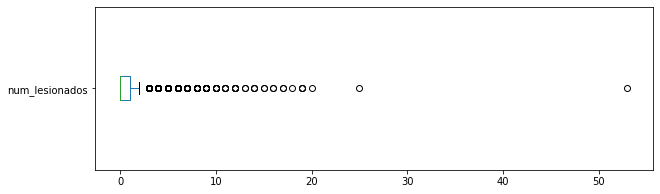

In [6]:
incidentes.num_lesionados.plot(kind='box', vert=False, figsize=(10,3))

De la misma manera, con la cantidad de muertos por incidente, podemos observar menos presencia de estos, teniendo mas agrupacion en la primer porcion de la grafica

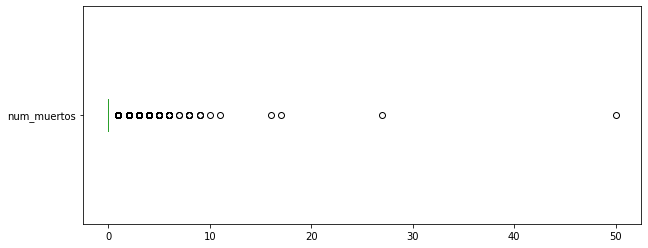

In [7]:
incidentes.num_muertos.plot(kind='box', vert=False, figsize=(10,4))

Si hacemos una grafica de densidad para el numero de lesionados, concuerda con lo anterior dicho, ya que hay mas precencia de estos en las primeras cantidades

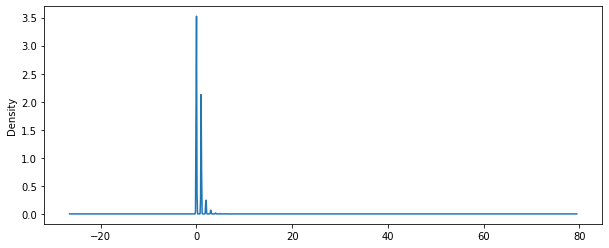

In [8]:
incidentes.num_lesionados.plot(kind='density',  figsize=(10,4))

Para tener una mejor visualizacoin de los datos, tomaremos la columna de numero de muertos, filtrando por los que tengan menos de 5 muertos(tomando como referencia a las graficas anteriores), y dibujamos lineas verticales para la mediana y el promedio, las cuales concuerdan concuerdan con la informacion que tenemos arriba.

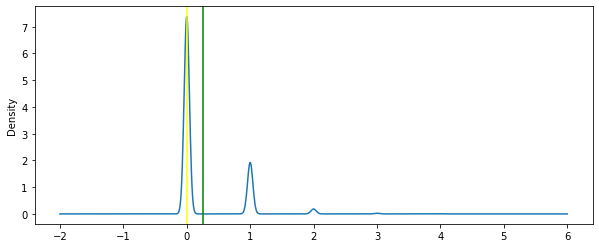

In [9]:
muertos_grafica = incidentes[incidentes.num_muertos <5].num_muertos.plot(kind='density',  figsize=(10,4))
muertos_grafica.axvline(incidentes[incidentes.num_muertos <5].num_muertos.mean(), color="green")
muertos_grafica.axvline(incidentes[incidentes.num_muertos <5].num_muertos.median(), color="yellow")

---
Hacemos otra grafica tipo histograma, que evidentemente sigue la tendencia de la graficas anteriores, sin embargo, hacemos mucho enfasis en el numero de muertos, porque una de nuestras preguntas de interes es determinar cuales son los estados mas peligrosos o mortales, por lo que es importante saber en que rango se situan la mayor presencia de estos.

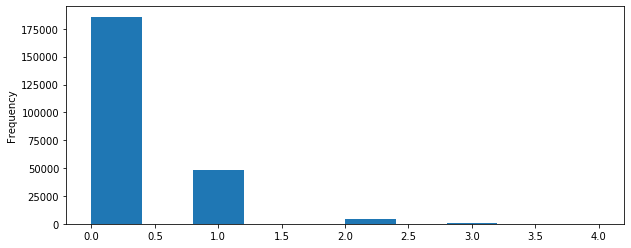

In [10]:
incidentes[incidentes.num_muertos <5].num_muertos.plot(kind='hist',  figsize=(10,4))

Agrupando los datos por frecuencia en estados, donde la cantidad de num_muertos es mayor a 1, nos damos cuenta que los estados que **mas incidentes** presenta son los siguientes

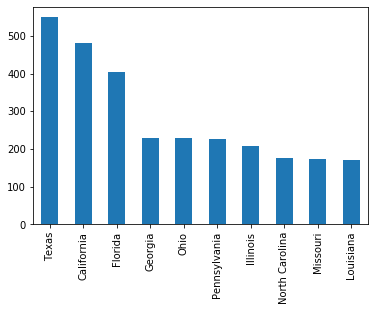

In [11]:
incidentes[incidentes.num_muertos > 1 ]['estado'].value_counts().head(10).plot.bar()

Para el conteo de armas involucradas, podemos observar como predominan, los incidentes con 1 o menos armas de fuego, mientras que las otras aparecen en grupos mas reducido

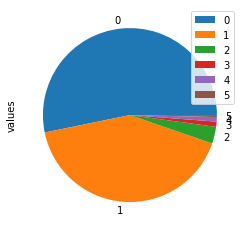

In [12]:
temp1 = incidentes['armas_involucradas'].apply(lambda x : "4+" if x>4 else str(x))
temp = temp1.value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.plot.pie( y="values", x="labels" )

---
Al hacer una relacion entre las columnas, lamentablemente no encontramos una relacion tan fuerte como esperabamos, lo mas cercando podria ser las armas involucradas con el numero de muertos.

In [13]:
relacion = incidentes.corr()
relacion

,num_muertos,num_lesionados,armas_involucradas
num_muertos,1.000000,-0.125425,-0.021718
num_lesionados,-0.125425,1.000000,-0.041273
armas_involucradas,-0.021718,-0.041273,1.000000


([<matplotlib.axis.YTick at 0x7fad46533990>,
 <a list of 3 Text yticklabel objects>)

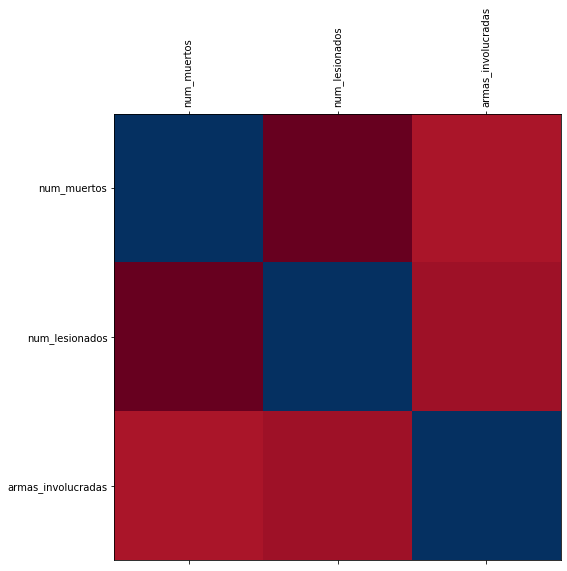

In [14]:
grafica = plt.figure(figsize=(8,8))
plt.matshow(relacion, cmap='RdBu', fignum=grafica.number)
plt.xticks(range(len(relacion.columns)), relacion.columns, rotation="vertical")
plt.yticks(range(len(relacion.columns)), relacion.columns)

---
### Participantes
Ahora visualizaremos los datos de los participantes

In [15]:
participantes.head(5)

,incidente_id,index_participante,edad,genero,tipo,arrestado,muerto,herido
0,0,0,20,hombre,victima,1,0,0
1,1,0,20,hombre,victima,0,1,0
2,2,0,25,hombre,sospechoso,1,0,1
3,2,1,31,hombre,sospechoso,1,0,0
4,2,2,33,hombre,victima,0,1,0



Al describir las columnas, podemos observar diferentes aspectos:
- la mayor edad de un participante es 101
- el promedio de edad es de 29
- en un incidente puede haber hasta 66 participantes

In [16]:
participantes.describe()

,incidente_id,index_participante,edad,arrestado,muerto,herido
count,213754.000000,213754.000000,213754.000000,213754.000000,213754.000000,213754.000000
mean,122521.918795,0.529773,29.568083,0.329206,0.236744,0.317182
std,67484.349724,1.360625,13.091172,0.469926,0.425085,0.465380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65447.250000,0.000000,20.000000,0.000000,0.000000,0.000000
50%,123121.500000,0.000000,26.000000,0.000000,0.000000,0.000000
75%,180069.500000,1.000000,35.000000,1.000000,0.000000,1.000000
max,239676.000000,65.000000,101.000000,1.000000,1.000000,1.000000


Al describir los datos cuando el tipo de participante es sospechoso, observamos un par de diferencias, sobre todo en el estatus del participante, mientras que en el listado general, aparece que en promedio el 0.32 es arrestado, en el caso de los sospechosos aumenta drasticamente hasta 0.75 y los muertos pasan de 0.23  a 0.06, lo cual indicaría que los participantes tipo victima serian los mas afectados en esta area

In [17]:
participantes[participantes['tipo'] == 'sospechoso'].describe()

,incidente_id,index_participante,edad,arrestado,muerto,herido
count,91732.000000,91732.000000,91732.000000,91732.000000,91732.000000,91732.000000
mean,128545.359166,0.899948,29.192168,0.750709,0.066912,0.043224
std,66320.001122,1.498702,12.205517,0.432605,0.249871,0.203361
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73471.750000,0.000000,20.000000,1.000000,0.000000,0.000000
50%,130186.000000,1.000000,26.000000,1.000000,0.000000,0.000000
75%,185270.250000,1.000000,35.000000,1.000000,0.000000,0.000000
max,239676.000000,58.000000,98.000000,1.000000,1.000000,1.000000


Efectivamente, en el apartado de muerto, el promedio aumenta hasta 0.36, lo cual es incluso mayor al promedio general, sin embargo el que mas aumenta de sobre manera es el de herido, pasando de 0.04 de sospechosos a 0.52 en victimas

In [18]:
participantes[participantes['tipo'] == 'victima'].describe()

,incidente_id,index_participante,edad,arrestado,muerto,herido
count,122022.000000,122022.000000,122022.000000,122022.000000,122022.000000,122022.000000
mean,117993.700669,0.251487,29.850683,0.012334,0.364418,0.523135
std,67996.435109,1.172201,13.712648,0.110371,0.481269,0.499467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59539.500000,0.000000,20.000000,0.000000,0.000000,0.000000
50%,117755.500000,0.000000,26.000000,0.000000,0.000000,1.000000
75%,175675.750000,0.000000,36.000000,0.000000,1.000000,1.000000
max,239676.000000,65.000000,101.000000,1.000000,1.000000,1.000000


---
Agrupando los datos por tipo, podemos observar que las victimas superan en frecuencia a los sospechosos, asi como predomina la cantidad de hombres en los incidentes.

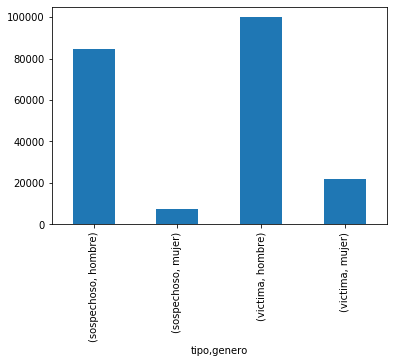

In [19]:
participantes.groupby(['tipo', 'genero'])['tipo'].count().plot.bar(y='frecuency', stacked=True)


En esta Grafica, agrupada por edad, observamos que la frecuencia aumenta drasticamente, al llegar a 20 años, pero apartir de ahi, sigue una tendencia a la baja.

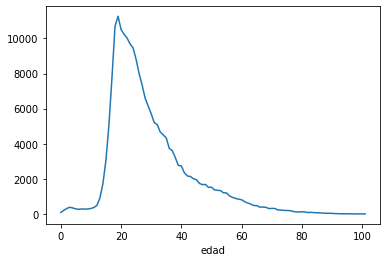

In [20]:
participantes.groupby(['edad'])['edad'].count().plot.line(y='frecuency')

Sin embargo, si hacemos una comparacion de la misma grafica, pero filtrada por tipo, podemos observar que no hay mucha diferencia entre si

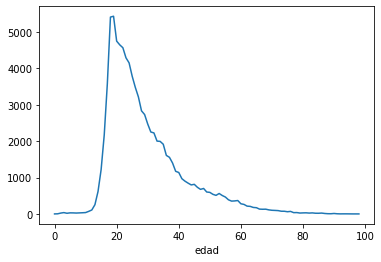

In [21]:
participantes[participantes.tipo=='sospechoso'].groupby(['edad'])['edad'].count().plot.line(y='frecuency')

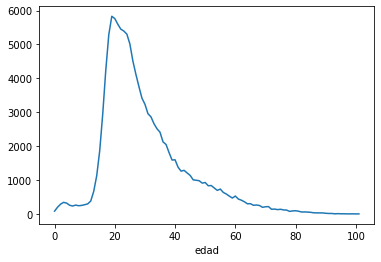

In [22]:
participantes[participantes.tipo=='victima'].groupby(['edad'])['edad'].count().plot.line(y='frecuency')

Haciendo un filtrado por los participantes tipo victima, observamos que mas de la mitad, no murieron a causa del incidente, sin embargo, con esos mas de 44 mil podriamos obtener algunas predicciones

In [23]:
participantes[participantes.tipo =='victima'].groupby('muerto')['muerto'].count().reset_index(name='count')

,muerto,count
0,0,77555
1,1,44467


Al observar si hay una correlacion entre los datos, no podemos interpretar mucho, ya que los datos en esta tabla son mayormente binarios.

In [24]:
relacion = participantes.corr()

---
### Procedemos a unir los incidentes con los participantes de una manera estructurada

In [27]:
i_p = pd.merge(incidentes, participantes, left_index=True, right_on='incidente_id')

---
De la misma, no podemos encontrar una fuerte correlacion en los datos, por lo que tendremos que proseguir con los objetivos principales, sin profundizar mas en los datos

In [28]:
i_p.corr()

,num_muertos,num_lesionados,armas_involucradas,incidente_id,index_participante,edad,arrestado,muerto,herido
num_muertos,1.000000,0.513378,-0.013783,0.002389,0.440482,0.076391,-0.129132,0.409472,-0.184475
num_lesionados,0.513378,1.000000,-0.023965,-0.009250,0.447391,-0.068731,-0.197304,-0.130134,0.408862
armas_involucradas,-0.013783,-0.023965,1.000000,0.124528,0.190308,0.021035,0.146251,-0.046160,-0.066250
incidente_id,0.002389,-0.009250,0.124528,1.000000,-0.013552,0.012049,0.203697,0.008056,0.003653
index_participante,0.440482,0.447391,0.190308,-0.013552,1.000000,-0.066758,0.184554,-0.132865,-0.091777
edad,0.076391,-0.068731,0.021035,0.012049,-0.066758,1.000000,-0.052015,0.152225,-0.087376
arrestado,-0.129132,-0.197304,0.146251,0.203697,0.184554,-0.052015,1.000000,-0.388966,-0.426252
muerto,0.409472,-0.130134,-0.046160,0.008056,-0.132865,0.152225,-0.388966,1.000000,-0.379346
herido,-0.184475,0.408862,-0.066250,0.003653,-0.091777,-0.087376,-0.426252,-0.379346,1.000000


In [29]:
i_p['fecha'] = pd.to_datetime(i_p['fecha'])

In [30]:
i_p['year'] = i_p.fecha.dt.to_period('Y')

Exponiendo las cifras de los estados mas violentos, en base a si han salido muertos o heridos, hacemos un conteo de los incidentes, para poder identificar un factor que nos pueda ayudar a identificar si hubo un incremento o decremento de los mismo

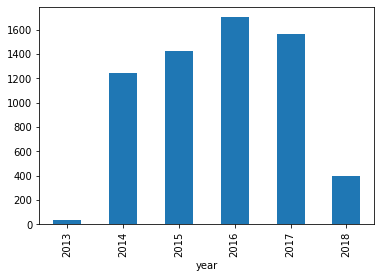

In [77]:
total_texas = i_p[(i_p.estado=='Texas') & ( (i_p.muerto == 1) | (i_p.herido== 1)) ].groupby('year')['fecha'].count()
total_texas.plot.bar(y='frecuency')

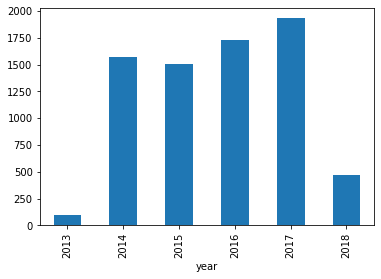

In [62]:
total_california = i_p[(i_p.estado=='California') & ( (i_p.muerto == 1) | (i_p.herido== 1)) ].groupby('year')['fecha'].count()
total_california.plot.bar(y='frecuency')

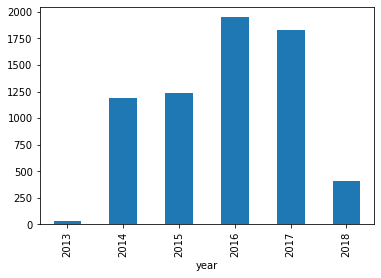

In [63]:
total_florida = i_p[(i_p.estado=='Florida') & ( (i_p.muerto == 1) | (i_p.herido== 1)) ].groupby('year')['fecha'].count()
total_florida.plot.bar(y='frecuency')

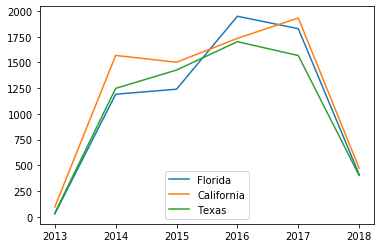

In [87]:
df = pd.DataFrame({

   'Florida': [total_florida[0], total_florida[1], total_florida[2], total_florida[3], total_florida[4], total_florida[5],],
   'California': [total_california[0], total_california[1], total_california[2], total_california[3], total_california[4], total_california[5],],
   'Texas': [total_texas[0],total_texas[1], total_texas[2], total_texas[3], total_texas[4], total_texas[5],],

   }, index=[2013, 2014, 2015, 2016, 2017, 2018])

lines = df.plot.line()
